# Alzheimer's Disease Prediction Using Machine Learning Models

## 1. Introduction

Alzheimer's Disease (AD) is a progressive neurological condition characterized by short-term memory loss, paranoia, and delusional thoughts often mistaken for signs of stress or aging and there is currently no definitive medical cure. Continuous medication is necessary for managing AD, which is a chronic condition lasting for years or even a lifetime. It's crucial to administer medication at the appropriate stage to minimize brain damage.
<br>

In the early stages of Alzheimer's Disease, individuals can typically function independently, engaging in daily activities such as work, driving, and socializing. However, they may experience occasional memory lapses, such as difficulty recalling familiar words or names, which may be noticed by those close to them. Early-stage challenges include:
<li>1. Difficulty recalling the right words or names.</li>
<li>2. Struggling to remember names when meeting new people.</li>
<li>3. Challenges in social or work settings due to memory issues.</li>
<li>4. Forgetfulness, such as misplacing objects or forgetting recently read information.</li>
<li>5. Difficulty planning or organizing tasks and activities</li>
<br>
The goal of this project is to indentify the gaps between knowledge, genders, external conditions and try to understand how those factors could affect the patients 
<br>
The datasets for Alzheimer's Disease are available on Kaggle, I will use various ML methods (both supervised and unsupervised) in this project to have a better overview and also be able to compare the outcome results

## 2. Data preparation 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [68]:
# Load data
df_cross = pd.read_csv("oasis_cross-sectional.csv")
df_long = pd.read_csv("oasis_longitudinal.csv")

In [69]:
print(df_long.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [70]:
print(df_long.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


In [71]:
print(df_cross.dtypes)


ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object


In [72]:
print(df_cross.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None


In [8]:
#1	ID	Identification
#2	M/F-Gender (M if Male, F if Female)
#3	Hand-Handedness
#4	Age-Age in years
#5	EDUC-Years of education
#6	SES-Socio Economic Status
#7	MMSE-Mini Mental State Examination
#8	CDR-Clinical Dementia Rating
#9	eTIV-Estimated Total Intracranial Volume
#10	nWBV-Normalize Whole Brain Volume
#11	ASF-Atlas Scaling Factor
#12	Delay-Delay


In [73]:
# Rename cols to match names in df_cross
df_long = df_long.rename(columns={"MRI ID": "ID", "EDUC": "Educ", "MR Delay": "Delay"})


In [74]:
# Concatenate df_cross with df_long
df = pd.concat([df_cross, df_long])
df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,Group,Visit
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185_MR2,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,842.0,OAS2_0185,Demented,2.0
369,OAS2_0185_MR3,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,2297.0,OAS2_0185,Demented,3.0
370,OAS2_0186_MR1,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,0.0,OAS2_0186,Nondemented,1.0
371,OAS2_0186_MR2,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,763.0,OAS2_0186,Nondemented,2.0


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          809 non-null    object 
 1   M/F         809 non-null    object 
 2   Hand        809 non-null    object 
 3   Age         809 non-null    int64  
 4   Educ        608 non-null    float64
 5   SES         570 non-null    float64
 6   MMSE        606 non-null    float64
 7   CDR         608 non-null    float64
 8   eTIV        809 non-null    int64  
 9   nWBV        809 non-null    float64
 10  ASF         809 non-null    float64
 11  Delay       393 non-null    float64
 12  Subject ID  373 non-null    object 
 13  Group       373 non-null    object 
 14  Visit       373 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 101.1+ KB
None


In [76]:
df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,Group,Visit
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185_MR2,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,842.0,OAS2_0185,Demented,2.0
369,OAS2_0185_MR3,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,2297.0,OAS2_0185,Demented,3.0
370,OAS2_0186_MR1,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,0.0,OAS2_0186,Nondemented,1.0
371,OAS2_0186_MR2,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,763.0,OAS2_0186,Nondemented,2.0


In [77]:
#Removing useless columns
df=df.drop(columns=['Delay','Subject ID','ID','Visit','Hand'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     809 non-null    object 
 1   Age     809 non-null    int64  
 2   Educ    608 non-null    float64
 3   SES     570 non-null    float64
 4   MMSE    606 non-null    float64
 5   CDR     608 non-null    float64
 6   eTIV    809 non-null    int64  
 7   nWBV    809 non-null    float64
 8   ASF     809 non-null    float64
 9   Group   373 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 69.5+ KB


In [78]:
df

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


<Axes: >

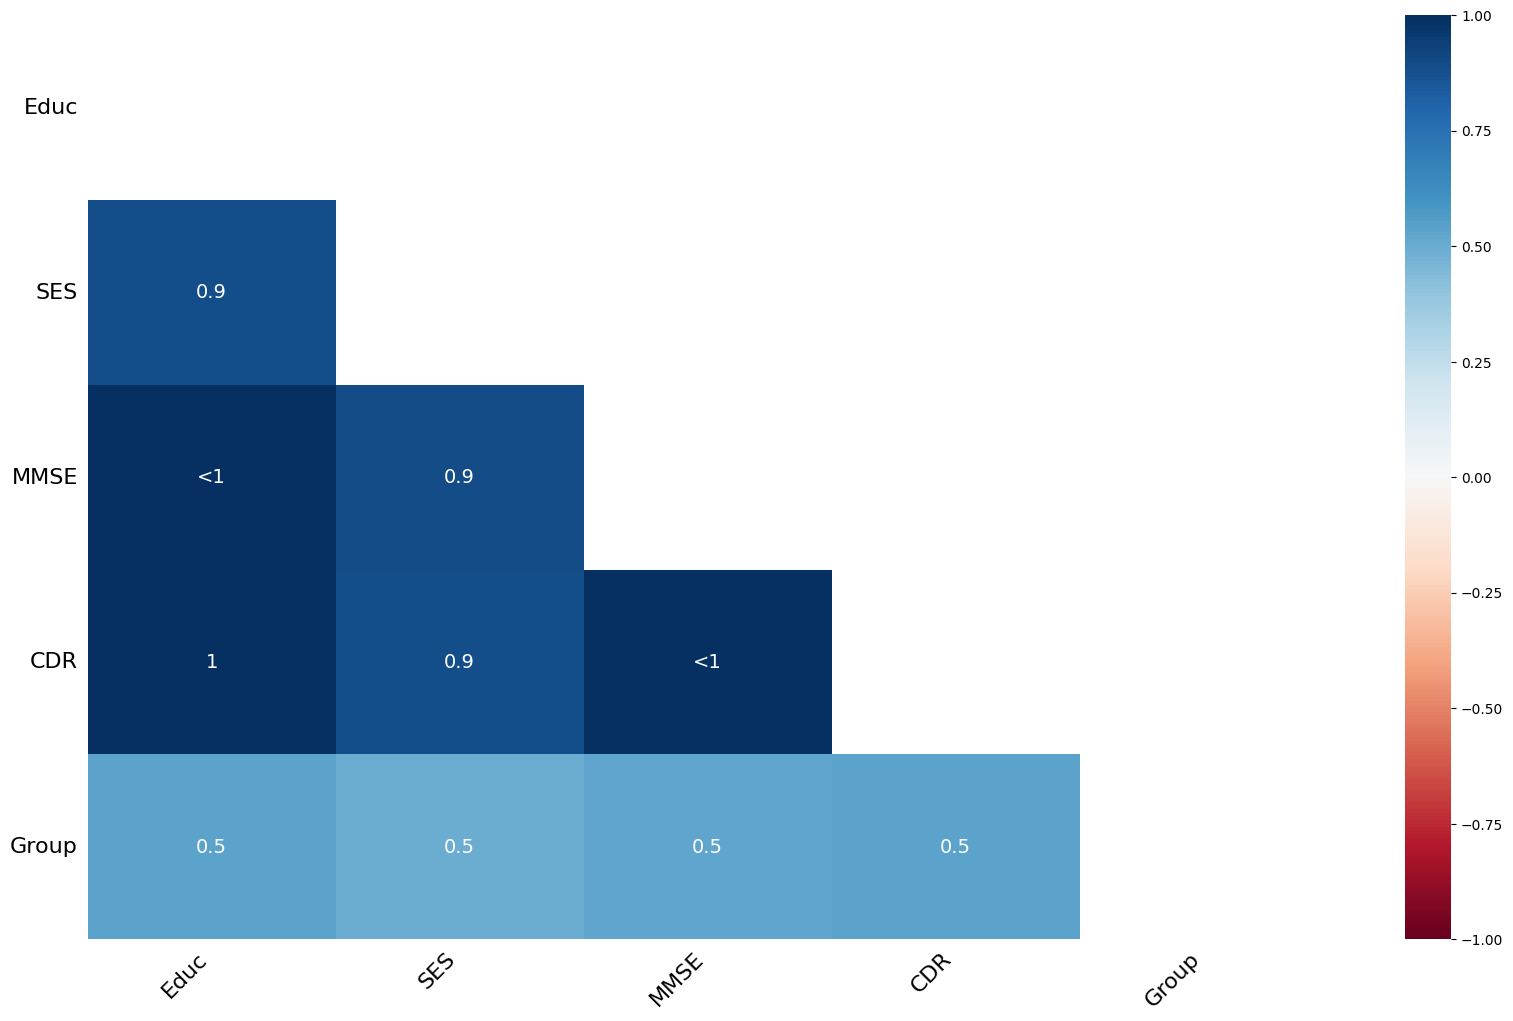

In [15]:
msno.heatmap(df)

We can see that there are still a lot of missing variables here, instead of trying to filling them, I will remove the rows with missing data

In [79]:
# Drop rows with missing target variable
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     354 non-null    object 
 1   Age     354 non-null    int64  
 2   Educ    354 non-null    float64
 3   SES     354 non-null    float64
 4   MMSE    354 non-null    float64
 5   CDR     354 non-null    float64
 6   eTIV    354 non-null    int64  
 7   nWBV    354 non-null    float64
 8   ASF     354 non-null    float64
 9   Group   354 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 30.4+ KB


## 3. Visualization

#### 1.Gender

As I already eliminated the 'Group' columns in the previous step, I would like to use it again  in the 'df_long' set to compared the rate of dementia based on patient's gender

In [17]:
# Create plot function
def dementia(n):
    Nondemented = (df_long['Group']=='Demented').value_counts()#here is actually nondemented
    Demented = (df_long['Group']=='Nondemented').value_counts()#here is demented

    df_bar = pd.DataFrame([Demented, Nondemented])
    df_bar.index = ['Demented', 'Nondemented']
    df_bar.plot(kind='bar', stacked=True, figsize=(8, 5))


Text(0.5, 1.0, 'Gender and Demented rate')

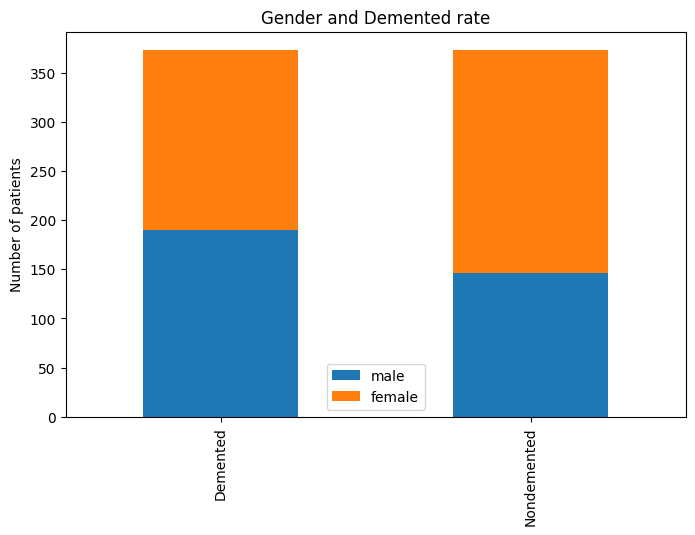

In [18]:
dementia('M/F')

plt.legend(['male','female'])

plt.ylabel('Number of patients')

plt.title('Gender and Demented rate')

<Axes: xlabel='M/F', ylabel='Count'>

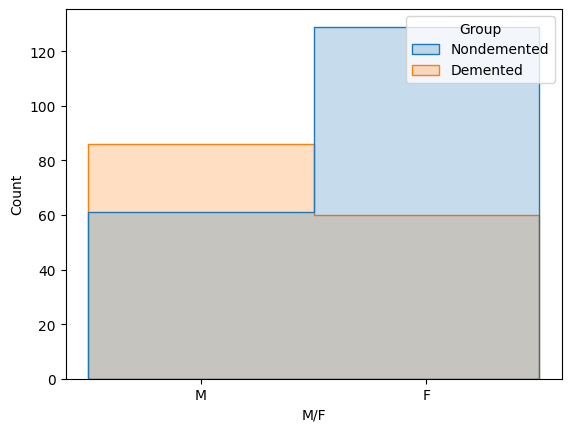

In [57]:
sns.histplot(df_long, x="M/F", hue="Group", element="step", discrete=True)

#### 2. MMSE-Mini Mental State Examination

In [58]:
MMSE= df_long[['MMSE','Group']]
print(MMSE)
MMSE=MMSE.dropna()

     MMSE        Group
0    27.0  Nondemented
1    30.0  Nondemented
2    23.0     Demented
3    28.0     Demented
4    22.0     Demented
..    ...          ...
368  28.0     Demented
369  26.0     Demented
370  30.0  Nondemented
371  30.0  Nondemented
372  30.0  Nondemented

[336 rows x 2 columns]


In [21]:
MMSE= MMSE.drop(MMSE[MMSE['Group'] == 'Converted'].index)

<Axes: xlabel='MMSE', ylabel='Count'>

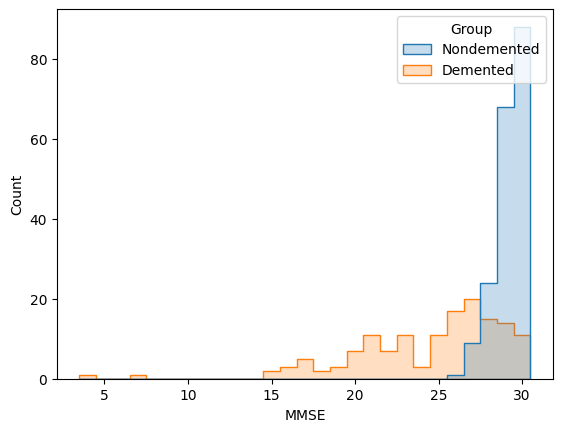

In [59]:
sns.histplot(MMSE, x="MMSE", hue="Group", element="step", discrete=True)

We can see that with nondemented group, the MMSE score is higher than the demented and converted ones

#### 3. Age

In [23]:
Age=df_long[['Group','Age']]
Age=Age.dropna()
print (Age)

           Group  Age
0    Nondemented   87
1    Nondemented   88
2       Demented   75
3       Demented   76
4       Demented   80
..           ...  ...
368     Demented   82
369     Demented   86
370  Nondemented   61
371  Nondemented   63
372  Nondemented   65

[373 rows x 2 columns]


In [24]:
Age = Age.drop(Age[Age['Group'] == 'Converted'].index)

<Axes: xlabel='Age', ylabel='Count'>

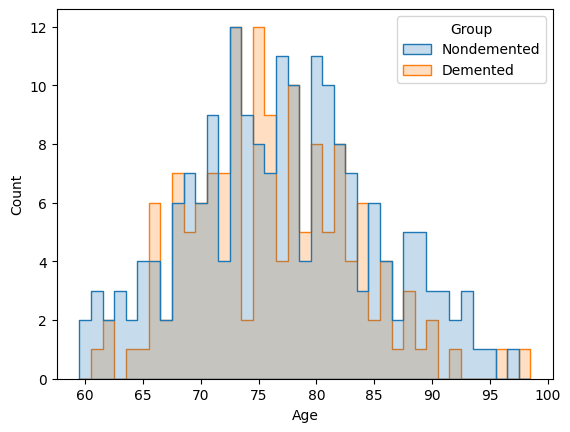

In [60]:
sns.histplot(Age , x="Age", hue="Group", element="step", discrete=True)

#### 4. Clinical Dementia Rating

In [48]:
CDR=df_long[['Group','CDR']]
CDR=CDR.dropna()
CDR = CDR.drop(CDR[CDR['Group'] == 'Converted'].index)
print (CDR)


           Group  CDR
0    Nondemented  0.0
1    Nondemented  0.0
2       Demented  0.5
3       Demented  0.5
4       Demented  0.5
..           ...  ...
368     Demented  0.5
369     Demented  0.5
370  Nondemented  0.0
371  Nondemented  0.0
372  Nondemented  0.0

[336 rows x 2 columns]


<Axes: xlabel='CDR', ylabel='Count'>

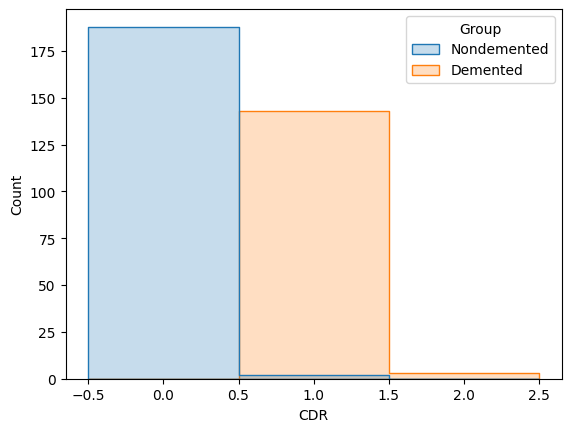

In [27]:
sns.histplot(CDR, x="CDR", hue="Group", element="step", discrete=True)

#### 5. Education

<Axes: xlabel='EDUC', ylabel='Count'>

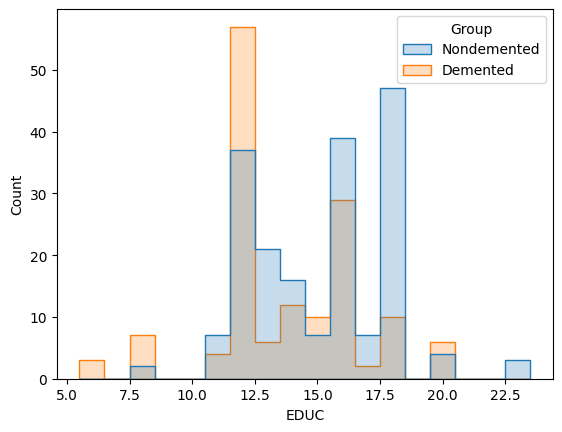

In [56]:
df_long = df_long.drop(df_long[df_long['Group'] == 'Converted'].index)
sns.histplot(df_long, x="EDUC", hue="Group", element="step", discrete=True)

#### 6. eTIV-Estimated Total Intracranial Volume


C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(900.0, 2100.0)

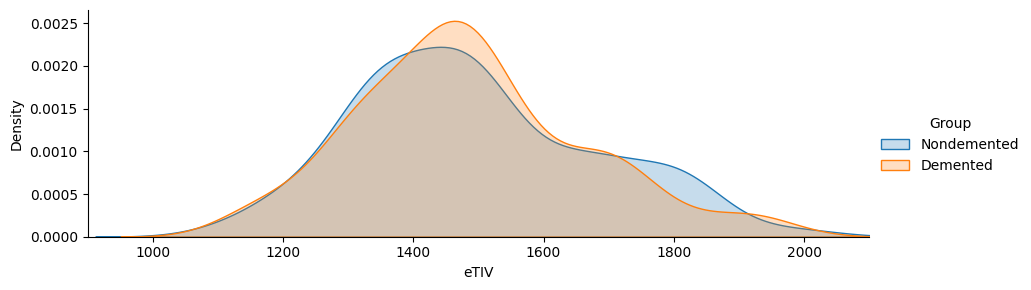

In [61]:
eTIV = sns.FacetGrid(df_long, hue="Group", aspect=3)  
eTIV.map(sns.kdeplot, 'eTIV', shade=True)  
eTIV.set(xlim=(0, df_long['eTIV'].max())) 
eTIV.add_legend() 
plt.xlim(900, 2100)

#### 7. nWBV-Normalize Whole Brain Volume

<Axes: xlabel='nWBV', ylabel='Count'>

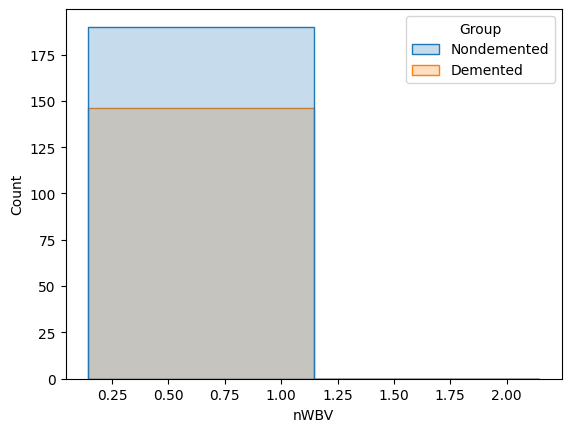

In [62]:
sns.histplot(df_long, x="nWBV", hue="Group", element="step", discrete=True)

#### 8. Social Economic Status

<Axes: xlabel='SES', ylabel='Count'>

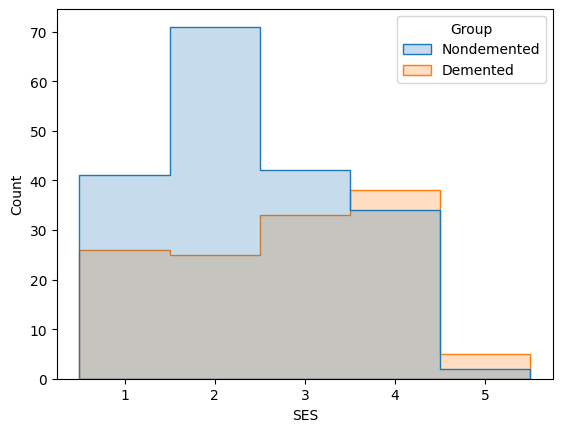

In [63]:
sns.histplot(df_long, x="SES", hue="Group", element="step", discrete=True)

#### Conclusion: 
- Men are more likely to have AD than women
- High social status and educated groups have lower demented rates than the other group
- Nondemented group has higher brain volume than Demented group
- Higher concentration in Demented group than Nondemented group

## 4. Model

In [80]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import model_selection as ms
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

Based on the previous studies and researchs which show that Logistics and Random Forest have pretty high rate of accuracy, I will work on these two specific models and compare them together to choose the best approach

#### Data Split

In [82]:
# Feature
df=pd.get_dummies(df,drop_first=True)
df=df.drop(columns=['M/F_M'])
df=df.dropna()

print(df)

     Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  Group_Demented  \
0     87  14.0  2.0  27.0  0.0  1987  0.696  0.883           False   
1     88  14.0  2.0  30.0  0.0  2004  0.681  0.876           False   
5     88  18.0  3.0  28.0  0.0  1215  0.710  1.444           False   
6     90  18.0  3.0  27.0  0.0  1200  0.718  1.462           False   
7     80  12.0  4.0  28.0  0.0  1689  0.712  1.039           False   
..   ...   ...  ...   ...  ...   ...    ...    ...             ...   
368   82  16.0  1.0  28.0  0.5  1693  0.694  1.037            True   
369   86  16.0  1.0  26.0  0.5  1688  0.675  1.040            True   
370   61  13.0  2.0  30.0  0.0  1319  0.801  1.331           False   
371   63  13.0  2.0  30.0  0.0  1327  0.796  1.323           False   
372   65  13.0  2.0  30.0  0.0  1333  0.801  1.317           False   

     Group_Nondemented  
0                 True  
1                 True  
5                 True  
6                 True  
7                 True  
..       

In [81]:
df.dtypes

M/F       object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Group     object
dtype: object

In [83]:
df['Group_Demented']=df['Group_Demented'].astype('float')
df.dtypes

Age                    int64
Educ                 float64
SES                  float64
MMSE                 float64
CDR                  float64
eTIV                   int64
nWBV                 float64
ASF                  float64
Group_Demented       float64
Group_Nondemented       bool
dtype: object

In [84]:
df.columns
feature_df=df[['MMSE','nWBV','CDR','eTIV']]# I ananlyse only the internal factors which affect directly to the patients
#Data shape(from 2d to 1d for variable of y)
X=np.asarray(feature_df)
y=np.asarray(df['Group_Demented'])# change variable's form
y2=np.asarray(df['Group_Nondemented'])
y[5:20]

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

#### 4.1. LogisticRegression

Logistic regression is a special case of Generalized Linear Models with a Binomial / Bernoulli conditional distribution and a Logit link. The numerical output of the logistic regression, which is the predicted probability, can be used as a classifier by applying a threshold (by default 0.5) to it

We have this as the standard equation for Logistics Regression :
<p style="text-align: center;">$f(x)$ = $\frac{1}{1+exp(a+b_0 x_0)}$</p>

#### 4.1.1. Demented group 


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=1)

In [86]:
X_train.shape

(265, 4)

In [87]:
y_train.shape

(265,)

In [88]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred=log.predict(X_test)

In [90]:
confusion_matrix(y_test,y_pred)

array([[51,  1],
       [12, 25]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Test Data of Demented Group')

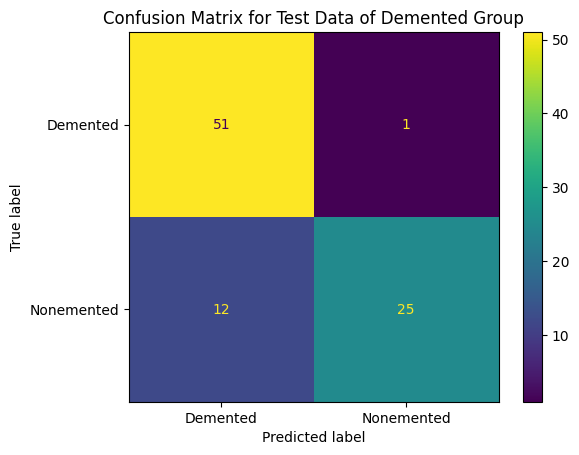

In [91]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=["Demented", "Nonemented"])
confusion_matrix_display.plot()
plt.title("Confusion Matrix for Test Data of Demented Group")

#### 4.1.1. Nondemented group


In [110]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,y2, random_state=1)


In [111]:
X_train_1.shape

(265, 4)

In [94]:
y_train_1.shape

(265,)

In [112]:
log_1= LogisticRegression()
log_1.fit(X_train_1,y_train_1)

LogisticRegression()

In [96]:
y_pred_1=log_1.predict(X_test)
confusion_matrix(y_test_1,y_pred_1)

array([[40,  3],
       [ 1, 45]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Test Data of Nondemented Group')

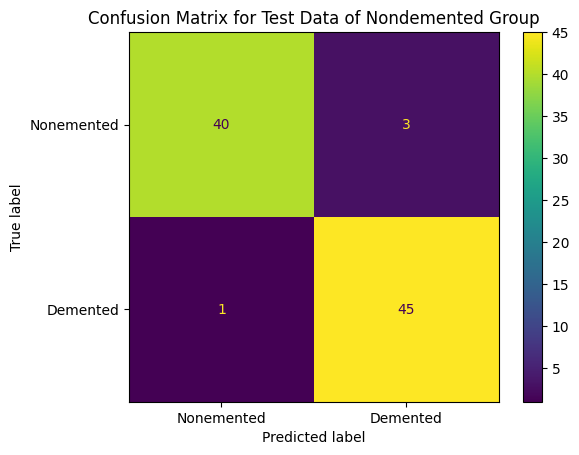

In [113]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_1, y_pred_1), display_labels=["Nonemented", "Demented"])
confusion_matrix_display.plot()
plt.title("Confusion Matrix for Test Data of Nondemented Group")

#### Conclusion :
We can see that the accuracy's rate appeared lower in the Demented Group than the Nondemented Group. However the negative rate of the Nondemented Group is less then the Demented Group 

#### 4.1. RandonForest

In [98]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
import graphviz
from sklearn import tree


#### 4.2.1. Demented


In [99]:
rd = RandomForestClassifier(n_estimators=10)
rd = rd.fit(X_train, y_train)

In [100]:
y_pred_rd= rd.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred_rd)
print("Accuracy:", accuracy)

Accuracy: 0.9325842696629213


In [104]:
y_pred_rd= y_pred_rd.reshape(-1,1)

In [118]:
y_test=y_test.reshape(-1,1)

In [121]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test,y_pred_rd)

Text(0.5, 1.0, 'Random Tree Decision of Demented Group')

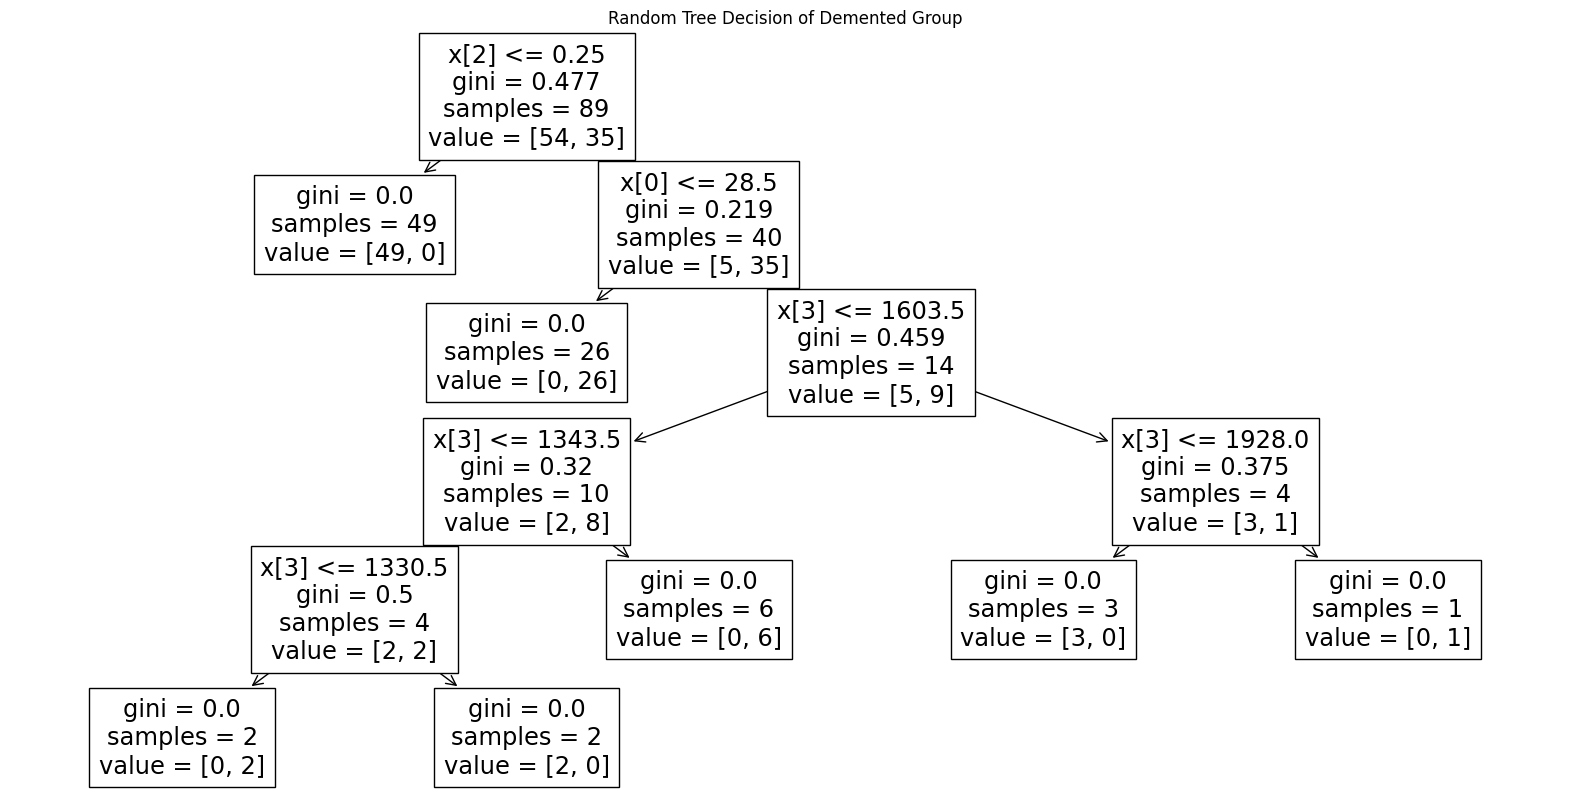

In [122]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf)
plt.title('Random Tree Decision of Demented Group')

#### 4.2.1. Nondemented

In [115]:
rd = RandomForestClassifier(n_estimators=10)
rd = rd.fit(X_train_1, y_train_1)
y_pred_rd_1= rd.predict(X_test_1)

In [116]:
accuracy = accuracy_score(y_test_1, y_pred_rd_1)
print("Accuracy:", accuracy)

Accuracy: 0.9325842696629213


Text(0.5, 1.0, 'Random Tree Decision of Nondemented Group')

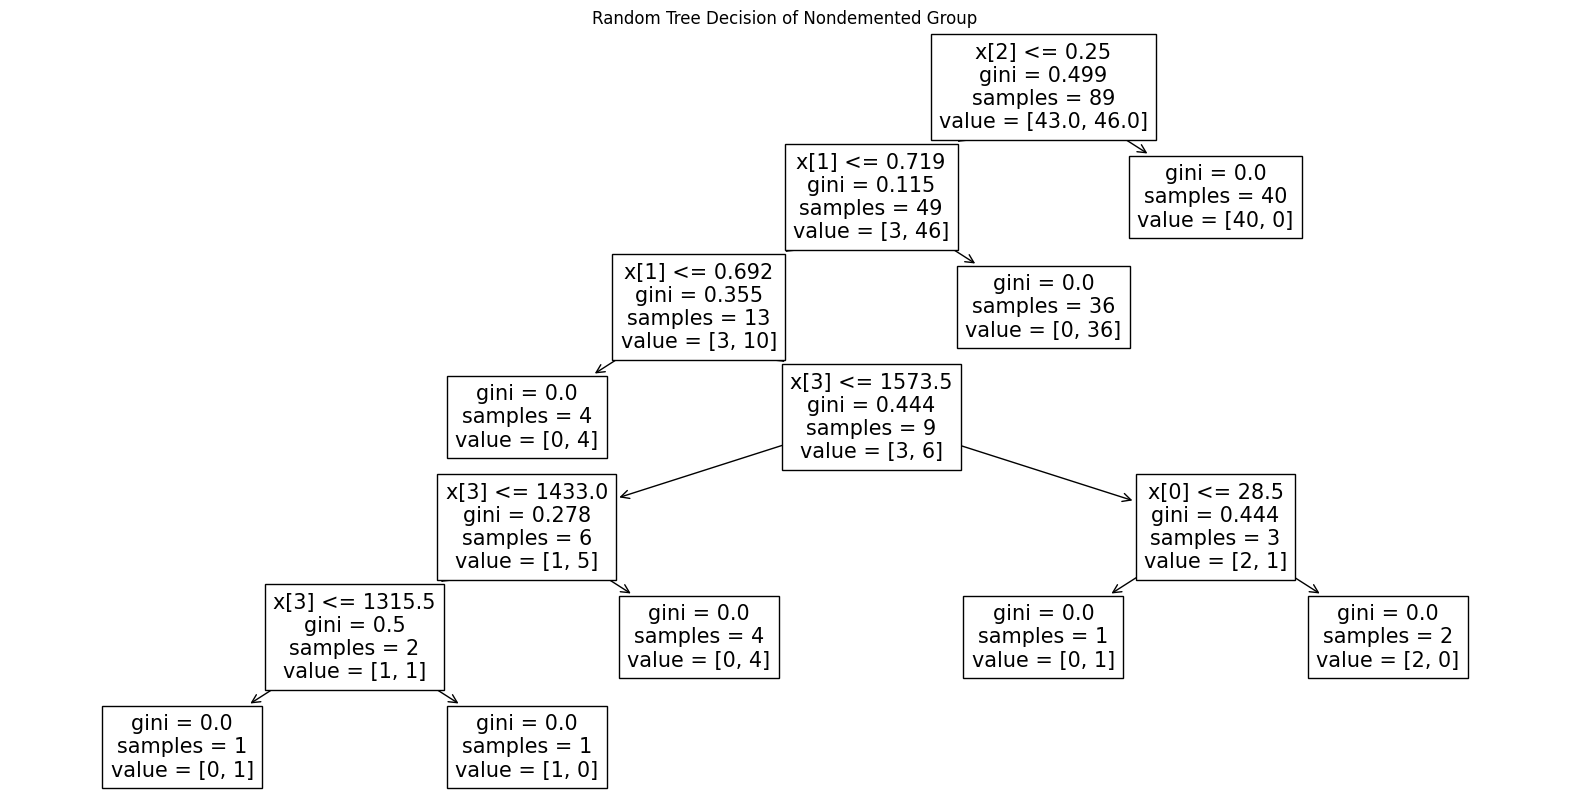

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test_1,y_pred_rd_1)

plt.figure(figsize=(20,10))
tree.plot_tree(clf)
plt.title('Random Tree Decision of Nondemented Group')

## 5. Conclusion

Alxheimer's is a major health concern, and it's important to provide early intervention and diagnose symptoms. However, it remains a challenging task to identify relevant attributes that can detect Alzheimer's very early

## 6.References


1.Giulio Benedetti, Alian K. . Alzheimer's Disease Prediction(Kaggle)
<br>
2.Hyunseok Choi, Kyuri Song, Saurin Parikh. Detecting Early Alzheimer's(Kaggle)
<br>
3.C. Kavitha,corresponding, Vinodhini Mani, S. R. Srividhya, Osamah Ibrahim Khalaf, Carlos Andrés Tavera Romero. Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models(National Library of Medicine)
<br>
4. Prajapati R, Khatri U, Kwon GR. “An efficient deep neural network binary classifier for alzheimer's disease classification,” In: International Conference on Artificial Intelligence in Information and Communication (ICAIIC). (2021), p. 231–234.